# COVID19 EDA
> 코로나19로 인해 사람들의 취미 활동, 여가 시간 및 관심사 등이 어떻게 바뀌었는 지 코로나 확진자 수와
> 2019년부터 2020년까지의 네이버 DataLab의 검색어 트랜드 자료 구글 유동인구 자료 등을 활용하여 분석해본다.


사용한 데이터는 다음과 같다.
1. DACON 제공 코로나 데이터
2. 한국 데이터 거래소 코로나 현황 누적 데이터
3. 네이버 DataLabs 검색어 트랜드
4. 구글 유동인구 데이터
5. 기상청 날씨 데이터
6. 국가통계포털 데이터

In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

Pandas를 이용해 코로나 누적 확진자 전체 확진자 수, 성별 및 연령, 그리고 지역 별 확진자를의 3가지의
데이터 프레임을 만든다.

* covid_state: 일 별 코로나 누적 확진자. 2020년 1월 1일부터 2021년 3월 29일까지 코로나 확진자를
일일 확진자, 누적 확진자 등으로 나타낸 데이터프레임
* covid_case: 주 별 코로나 확진자를 성별, 연령대 별 확진자 수 및 확진률로 나타낸 데이터프레임.
* covid_region: 지역 별 코로나 확진자를 날짜별 확진자 수, 전일 대비 증감 수 등으로 나타낸 데이터프레임.

In [2]:
covid_state = pd.read_csv("data/Covid19InfState.csv")
covid_case = pd.read_csv("data/Covid19GenAgeCaseInf.csv")
covid_region = pd.read_csv("data/Covid19SidoInfState.csv")

코로나 누적 확진자 데이터프레임의 각 인덱스는 다음과 같다.
![covid_state](https://user-images.githubusercontent.com/28593767/113980385-5dfd0c00-9881-11eb-9a8f-1309602e8380.png)

In [3]:
covid_state.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56
1,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
2,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
3,4,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
4,5,20200205,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.31,2020-02-05 9:43:16.16


In [4]:
covid_state.tail()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
452,459,20210325,00:00,100276.0,92068.0,86983.0,1709.0,6499.0,7298600.0,7485859.0,7398876.0,1.355287,2021-03-25 09:34:48.91,NaN
453,460,20210326,00:00,100770.0,92630.0,77409.0,1716.0,6424.0,7351224.0,7529403.0,7451994.0,1.352256,2021-03-26 09:33:28.3,NaN
454,461,20210327,00:00,101275.0,93475.0,75174.0,1721.0,6079.0,7396119.0,7572568.0,7497394.0,1.350803,2021-03-27 09:53:35.032,NaN
455,462,20210328,00:00,101757.0,93855.0,78605.0,1722.0,6180.0,7415234.0,7595596.0,7516991.0,1.353693,2021-03-28 11:17:23.373,NaN
456,463,20210329,00:00,102141.0,94124.0,78938.0,1726.0,6291.0,7435252.0,7616331.0,7537393.0,1.355124,2021-03-29 09:41:57.983,NaN


코로나 확진자의 성별 및 연령 별 데이터프레임의 각 인덱스는 다음과 같다.
![covid_case](https://user-images.githubusercontent.com/28593767/113980382-5ccbdf00-9881-11eb-8815-a9a4dc3d5487.png)

In [5]:
covid_case.head()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02 19:02:48.48,NaN
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02 19:02:48.48,NaN
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02 19:02:48.48,NaN
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02 19:02:48.48,NaN


In [6]:
covid_case.tail()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
3706,7731,40-49,14755,14.50,14.0,0.81,0.09,2021-03-28 14:22:32.187,NaN
3707,7732,30-39,13658,13.42,7.0,0.41,0.05,2021-03-28 14:22:32.187,NaN
3708,7733,20-29,15276,15.01,3.0,0.17,0.02,2021-03-28 14:22:32.187,NaN
3709,7734,10-19,6901,6.78,NaN,0.00,NaN,2021-03-28 14:22:32.187,NaN
3710,7735,0-9,4304,4.23,NaN,0.00,NaN,2021-03-28 14:22:32.187,NaN


마지막으로 코로나 확진자의 지역 별 데이터프레임의 각 인덱스는 다음과 같다.

![covid_region](https://user-images.githubusercontent.com/28593767/113980387-5e95a280-9881-11eb-9ff9-7c4e2f3c0783.png)

In [7]:
covid_region.head()

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt
0,1,2020년 3월 1일 16시,합계,NaN,NaN,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
1,2,2020년 3월 1일 16시,서울,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
2,3,2020년 3월 1일 16시,부산,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
3,4,2020년 3월 1일 16시,대구,NaN,NaN,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
4,5,2020년 3월 1일 16시,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN


In [8]:
covid_region.tail()

,seq,stdDay,gubun,gubunCn,gubunEn,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt
7868,8553,2021년 03월 29일 00시,전남,全南,Jeollanam-do,8.0,1.0,879.0,48.96,913.0,26.0,1.0,NaN,2021-03-29 09:46:05.834,NaN
7869,8554,2021년 03월 29일 00시,경북,庆北,Gyeongsangbuk-do,75.0,3.0,3281.0,131.19,3493.0,137.0,NaN,3.0,2021-03-29 09:46:05.834,NaN
7870,8555,2021년 03월 29일 00시,경남,庆南,Gyeongsangnam-do,15.0,20.0,2523.0,86.93,2922.0,384.0,2.0,18.0,2021-03-29 09:46:05.834,NaN
7871,8556,2021년 03월 29일 00시,제주,济州,Jeju,1.0,1.0,611.0,92.88,623.0,11.0,1.0,NaN,2021-03-29 09:46:05.834,NaN
7872,8557,2021년 03월 29일 00시,검역,隔離區,Lazaretto,4.0,5.0,2796.0,-,3149.0,349.0,5.0,NaN,2021-03-29 09:46:05.834,NaN


## COVID19 Data Preprocessing
각 데이터에 비교적 불필요한 내용이 많이 있기 때문에 **전처리** 작업이 필요하다.

누적 확진자 데이터 및 지역별 감염자 데이터에는 지역명이 한글(gubun), 중국어(gubunCn),
영어(gubunEn)의 3개 언어로 적혀있기 때문에 편의를 위해 *한글을 제외한 중국어, 영어를 데이터프레임에서
제거한다*.

In [9]:
covid_region_proc = covid_region.drop(['gubunCn', 'gubunEn'], axis = 1)
covid_region_proc.columns

Index(['seq', 'stdDay', 'gubun', 'deathCnt', 'incDec', 'isolClearCnt',
       'qurRate', 'defCnt', 'isolIngCnt', 'overFlowCnt', 'localOccCnt',
       'createDt', 'updateDt'],
      dtype='object')

In [10]:
covid_region_proc.head()

,seq,stdDay,gubun,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt
0,1,2020년 3월 1일 16시,합계,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
1,2,2020년 3월 1일 16시,서울,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
2,3,2020년 3월 1일 16시,부산,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
3,4,2020년 3월 1일 16시,대구,9.0,469.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN
4,5,2020년 3월 1일 16시,인천,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN


## COVID19 Data Visualization
> 지금까지 코로나19 확진자 데이터와 네이버 검색어 데이터를 전처리하고 간단하게 분석했고 이제 본격적으로
> 데이터를 시각화해보도록 한다.

/opt/anaconda3/envs/likelion/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


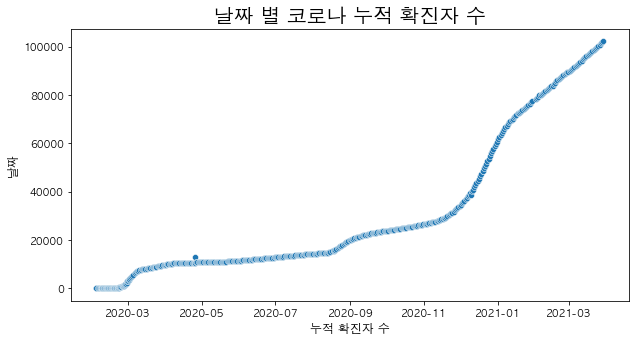

In [11]:
covid_state['case_date'] = pd.to_datetime(covid_state['createDt'],format = '%Y-%m-%d')

# Plot scatter graph
plt.figure(figsize=(10,5))
sns.scatterplot(covid_state['case_date'], covid_state['decideCnt'])
plt.title('날짜 별 코로나 누적 확진자 수', fontsize=20)
plt.xlabel("누적 확진자 수",fontsize=12)
plt.ylabel("날짜",fontsize=12)
plt.show()

날짜 별 누적 확진자 수는 무조건 증가할 수 밖에 없다. *하지만 그래프에 2020년 5월 직전에 갑자기
Outlier가 있는 것을 확인하였다.*

확인 결과 데이터의 오류로 2020년 4월 25일 데이터가 중복되었음을 알 수 있었다.

따라서 2020년 4월 25일자 116번 중복 행 데이터를 제거하고 다시 그래프를 만든다.

/opt/anaconda3/envs/likelion/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


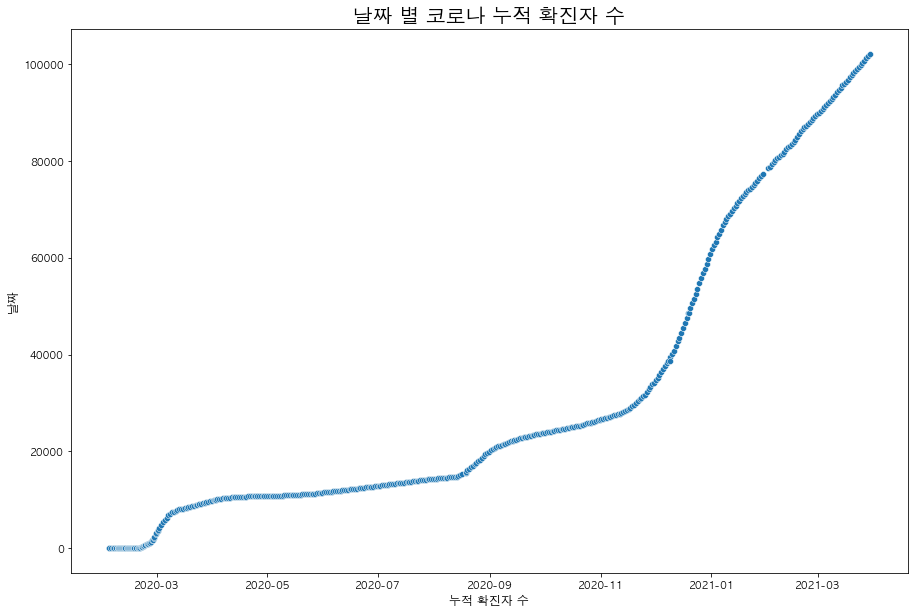

In [12]:
# 중복 데이터 제거
covid_state = covid_state.drop(covid_state.index[116])
# print(covid_state[110:120])

# 코로나 누적 확진자 수 그래프
plt.figure(figsize=(15,10))
sns.scatterplot(covid_state['case_date'], covid_state['decideCnt'])
plt.title('날짜 별 코로나 누적 확진자 수', fontsize=20)
plt.xlabel("누적 확진자 수",fontsize=12)
plt.ylabel("날짜",fontsize=12)
plt.show()
# plt.savefig("Total Cases by date")

지역별 코로나 확진자 데이터는 날짜 별로 전국 확진자 수 및 지역 별 확진자 수가 저장되어 있다.
<img width="1246" alt="ex" src="https://user-images.githubusercontent.com/28593767/114036389-fe235700-98ba-11eb-94d6-ab3ae87ec840.png">

예시에서 보다시피 같은 날짜에 합계, 서울, 부산, 대구 등 지역 전국 확진수와 지역 별 확진자가 같이 나와있다.

따라서 *날짜 별로 합계만 남기고 나머지는 제거한다.*

또한 날짜별 일일 확진자 수를 시각화한다.

In [13]:
covid_region_proc['case_date'] = pd.to_datetime(covid_region_proc['createDt'],format = '%Y-%m-%d')
# covid_region_proc.head(20)

# 각 날짜 별 합계만 남기고 나머지는 제거
covid_national = covid_region_proc.drop_duplicates('case_date', 'first')

In [14]:
covid_national.head()

,seq,stdDay,gubun,deathCnt,incDec,isolClearCnt,qurRate,defCnt,isolIngCnt,overFlowCnt,localOccCnt,createDt,updateDt,case_date
0,1,2020년 3월 1일 16시,합계,18.0,586.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02 19:27:57.57,NaN,2020-03-02 19:27:57.570
19,20,2020년 3월 4일 00시,합계,32.0,516.0,NaN,10.3,5328.0,NaN,NaN,NaN,2020-03-04 19:44:27.27,NaN,2020-03-04 19:44:27.270
37,38,2020년 3월 5일 00시,합계,35.0,438.0,NaN,11.1,5766.0,NaN,NaN,NaN,2020-03-05 15:29:39.39,NaN,2020-03-05 15:29:39.390
55,56,2020년 3월 6일 00시,합계,42.0,518.0,NaN,12.1,6284.0,NaN,NaN,NaN,2020-03-06 15:09:04.04,NaN,2020-03-06 15:09:04.040
73,74,2020년 3월 7일 00시,합계,44.0,483.0,NaN,12.1,6767.0,NaN,NaN,NaN,2020-03-07 15:29:59.59,NaN,2020-03-07 15:29:59.590


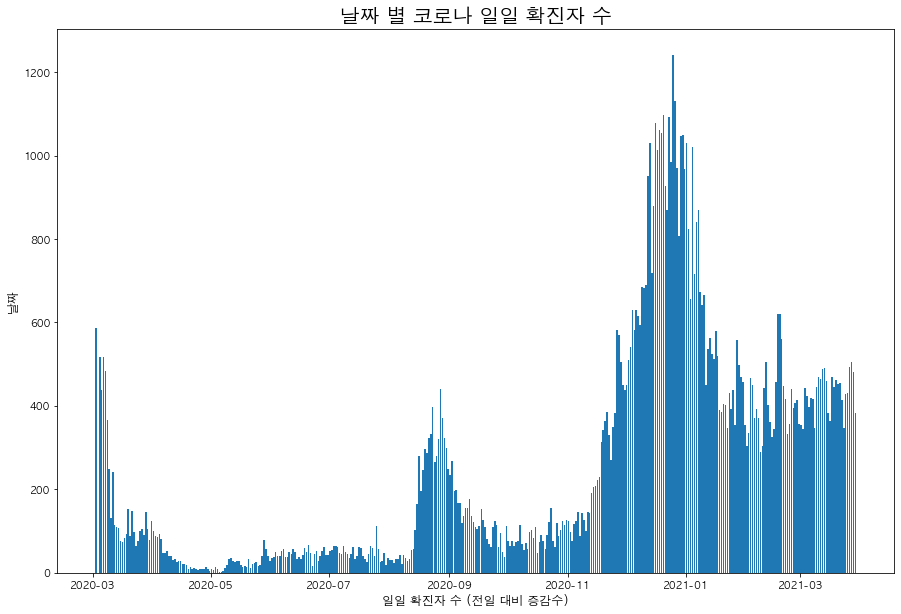

In [15]:
# 코로나 일일 확진자 수 그래프
plt.figure(figsize=(15,10))
plt.bar(covid_national['case_date'], covid_national['incDec'])
plt.title('날짜 별 코로나 일일 확진자 수', fontsize=20)
plt.xlabel("일일 확진자 수 (전일 대비 증감수)",fontsize=12)
plt.ylabel("날짜",fontsize=12)
plt.show()
# plt.savefig("Daily Cases.png")

## NAVER DataLab Trending Topics

다음으로 네이버 DataLab API를 이용해 추출한 2019년 1월부터 2020년 12월까지의 검색어 데이터를
데이터프레임으로 만든다.

필요없는 인덱스를 제거하고 데이터프레임을 전처리한다.

In [16]:
st = pd.read_csv('data/searchTrend.csv')
st = st[st.columns.drop(list(st.filter(regex='Unnamed: 0')))]
st = st.sort_values(by=['period'], axis = 0)
st = st.reset_index(drop=True)

st.head()

,period,제주도항공권,에버랜드자유이용권,롯데월드자유이용권,경주월드자유이용권,우도여행,아쿠아플라넷,파라다이스시티호텔,글램핑,리솜리조트,...,포슬린아트,서양자수,시화제작,오일파스텔원데이,꽃꽂이클래스,로고디자인,프로크리에이트수업,민화강습,pop글씨자격증,캐리커쳐수업
0,2019-01-01,47.25622,3.49574,12.23189,2.81570,0.75417,3.26743,1.71246,15.16670,6.82429,...,16.44590,21.58509,0.12287,0.00000,94.53204,80.38447,0.0,0.0,0.0,0.00327
1,2019-02-01,54.21990,6.04391,14.67942,2.37051,0.80776,2.65725,1.76801,17.88059,5.54509,...,18.00492,14.68359,0.12287,0.00000,79.84845,68.06644,0.0,0.0,0.0,0.00000
2,2019-03-01,51.40009,6.30823,6.51565,1.49204,0.87464,2.12136,1.65060,19.31096,4.83171,...,16.19974,18.02170,0.00000,0.12287,89.18697,93.53303,0.0,0.0,0.0,0.00273
3,2019-04-01,51.35988,12.83218,8.29934,1.74816,0.80057,1.79655,1.63949,26.49500,5.40807,...,27.86308,14.82695,0.10239,0.10239,100.00000,84.61179,0.0,0.0,0.0,0.00273
4,2019-05-01,51.73899,11.19207,7.74503,2.22000,0.86549,1.91724,1.78457,37.92612,5.88190,...,18.76685,12.71759,0.14335,0.00000,80.77001,93.85964,0.0,0.0,0.0,0.00273


## Analyzing NAVER Trending Topics
네이버 데이터프레임을 확인해보면 첫번째 인덱스가 제거되고 인덱스가 날짜 순으로 새롭게 리셋된 것을 알 수 있다.

네이버 인기 검색어 데이터는 한 번에 5개의 키워드까지 비교가 가능하고 검색량을 정규화하여 최대 검색량을 100으로 표현하고
최소 검색어를 0으로 표현하여 각 키워드의 월 별 검색량을 0부터 100으로 나타낸다. (분포도는 동일하다)

하지만 여러가지 데이터를 병합하는 과정에서 기준점에 비해 낮거나 높은 데이터의 경우 0 이하의 음수나 100 이상의
양수로 표현되기도 한다.

한 번에 5개까지의 키워드만 비교할 수 있기 때문에 검색량이 적은 "진조리"를 기준이 되는 키워드로 잡고
진조리를 포함하여 한 번에 4개의 키워드를 비교했다.

유의할 점은 데이터프레임 describe에서 확인할 수 있듯이 전체 145개의 검색어 키워드의 검색량의 차이가
매우 크므로 변환된 스케일에서 *상대적으로 비인기 검색어의 변화량은 확인하기 어렵다*는 점이다.


## Trending Topics Visualization
우리가 수집한 네이버의 검색어 데이터의 경우 4개의 대분류, **운동, 여행, 댄스/악기/미술, 자기계발/취미** 로
나뉘어 있고 각 대분류는 2 ~ 3가지의 소분류로 나뉘어있다.

![차트](https://user-images.githubusercontent.com/28593767/114044197-f7e4a900-98c1-11eb-9aa3-5cd23032190e.png)

이제부터 검색어 데이터를 대분류와 소분류, 그리고 구체적인 검색어를 이용해 인사이트를 도출한다.

In [17]:
# 카테고리 정리

st_cat1 = st[['제주도항공권', '에버랜드자유이용권', '롯데월드자유이용권', '경주월드자유이용권', '우도여행', '아쿠아플라넷', '파라다이스시티호텔', '글램핑', '리솜리조트', '쏠비치리조트', '제주도호텔', '제주도한달살기', '캠핑장', '파티룸']]
st_cat2 = st[['세부', '보라카이', '크루즈여행', '휴대용와이파이', '해외유심', '중국유심', '선불유심', '미국유심', '일본유심', '베트남유심','팔라우', '대마도', '유럽여행', '사이판', '괌', '코타키나발루', '스위스','신혼여행', '발리', '하와이', '아르헨티나']]
st_cat3 = st[['패러글라이딩','족구레슨', '서핑강습', '숏게임레슨', '테니스레슨','야구레슨','축구레슨','볼링강습','스키레슨']]
st_cat4 = st[['헬스장','pt','필라테스','요가', '크라이오테라피','크로스핏','홈트']]
st_cat5 = st[['발레레슨', '댄스학원', '방송댄스', '댄스원데이클래스', '한국무용취미', '다이어트댄스', '라틴댄스', '성인발레' , '춤원데이클래스', '1대1댄스', '힙합댄스', '키즈댄스학원', '스트릿댄스']]
st_cat6 = st[['피아노레슨', '셀프녹음실', '보컬레슨', '바이올린학원', '피아노온라인수업', '실용음악학원', '우쿨렐레수업', '판소리배우기', '음악학원', '하프레슨', '가야금', '미디레슨']]
st_cat7 = st[['백드롭페인팅', '아이패드드로잉클래스', '유화원데이클래스', '포슬린아트', '서양자수', '시화제작', '오일파스텔원데이', '꽃꽂이클래스', '로고디자인', '프로크리에이트수업', '민화강습', 'pop글씨자격증', '캐리커쳐수업']]
st_cat8 = st[['마크라메', '터프팅', '천연펄프점토', '우드썸', '웜아트', '라탄원데이클래스', '실크플라워', '디핑캔들', '도자기크레파스', '스와로브스키주판알']]
st_cat9 = st[['국제바리스타', '로스팅자격증', '커피수업', 'sca디플로마', '마카롱창업반', '커피센서리', '로스팅교육', '수제청클래스', 'sca브루잉', 'sca센서리']]
st_cat10 = st[['화상영어추천', '화상영어', '전화영어', '원어민화상영어', '어린이화상영어', '초등화상영어', '영어화상수업', '전화중국어', '필리핀화상영어', '성인화상영어']]
st_cat11 = st[['데일리메이크업', '헤어커트배우기', '메이크업진단', '메이크업레슨', '메이크업수업', '펄스널컬러진단', '메이크업클래스', '퍼스널컬러진단키트', '속눈썹펌수강', '1:1메이크업']]
st_cat12 = st[['차상명공기업법학', '전수환경영학','지한송재무관리','황정빈경제학','러닝온', '로보로보','차상명법학', '이종하회계학','최재형회계학', '오라소마','어른학습지','강의','펫푸드스타일리스트', '앤서니타로','아로마인사이트카드','난타자격증']]

st_cat = pd.DataFrame(columns=['period', '국내여행', '해외여행', '아웃도어 스포츠', '인도어 스포츠', '댄스', '보컬/악기', '미술', '공예', '커피/요리', '외국어', '뷰티', '취업/자격증/기타'])

st_cat['period'] = st['period']
st_cat['국내여행'] = st_cat1.sum(axis=1)
st_cat['해외여행'] = st_cat2.sum(axis=1)
st_cat['아웃도어 스포츠'] = st_cat3.sum(axis=1)
st_cat['인도어 스포츠'] = st_cat4.sum(axis=1)
st_cat['댄스'] = st_cat5.sum(axis=1)
st_cat['보컬/악기'] = st_cat6.sum(axis=1)
st_cat['미술'] = st_cat7.sum(axis=1)
st_cat['공예'] = st_cat8.sum(axis=1)
st_cat['커피/요리'] = st_cat9.sum(axis=1)
st_cat['외국어'] = st_cat10
st_cat['뷰티'] = st_cat11.sum(axis=1)
st_cat['취업/자격증/기타'] = st_cat12.sum(axis=1)

# st_cat.to_csv('searchTrend_cat.csv', na_rep = 'NaN')

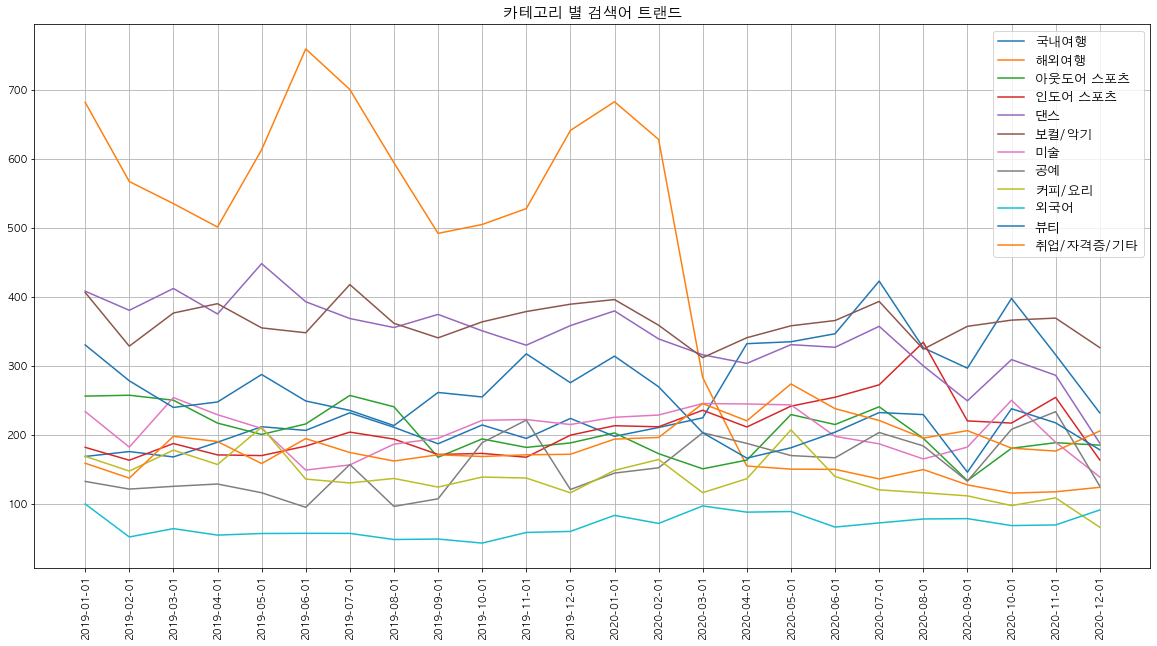

In [18]:
# 카테고리 별 검색어 트렌드 시각화
plt.figure(figsize=(20,10))
plt.title("카테고리 별 검색어 트랜드", fontsize=15)
for cat in st_cat.columns[1:]:
    plt.plot(st_cat['period'], st_cat[cat], "-", label=cat)
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()
plt.show()

# plt.savefig('fig1.png', dpi=300)

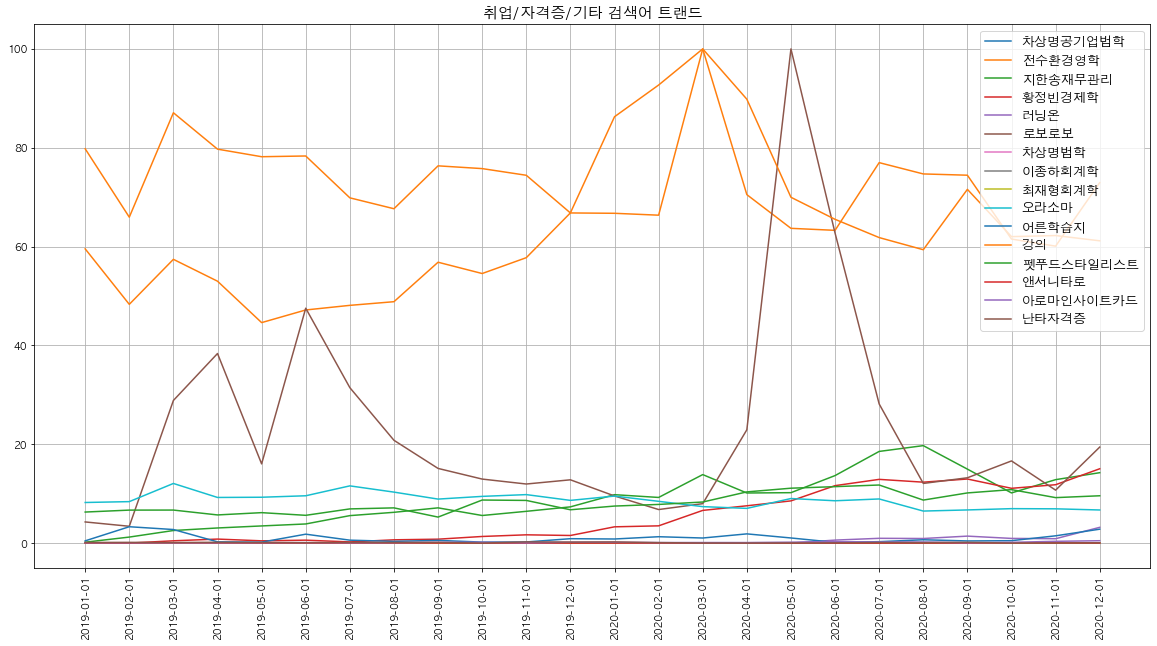

In [19]:
# 세부 카테고리 내 검색어
st_cat12 = pd.concat([st_cat12, st['period']], axis=1)
#print(st_cat3.head())
plt.figure(figsize=(20,10))
plt.title("취업/자격증/기타 검색어 트랜드", fontsize=15)
for cat in st_cat12.columns[:-1]:
    plt.plot(st_cat12['period'], st_cat12[cat], "-", label=cat)
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)
plt.show()
# plt.savefig('fig1.png',dpi=300)

위의 취업/자격증/기타 검색어 트렌드 시각화 동일하게 다른 11가지 카테고리에서 대해서도 시각화를
마친 이미지를 첨부한다.

나머지 11개의 카테고리 역시 동일한 코드에 다른 변수명만 입력하면 되므로 코드는 생략한다.

![01_국내여행](https://user-images.githubusercontent.com/28593767/114082607-ecf13f00-98e8-11eb-8028-4c8f7bebd78e.png)
![02_해외여행](https://user-images.githubusercontent.com/28593767/114082616-efec2f80-98e8-11eb-9d0c-8fe4f96ec7cc.png)
* 국내 여행과 해외 여행의 경우 큰 변화를 보인다. 특히 해외 여행은 19년에 비해 20년도에는 20%에서 30% 정도 밖에 되지 않는 한편
국내 여행의 검색량은 두 배 가깝게 늘어났다.
* 2019년도에 비해 2020년 연초에 날씨가 풀리고 봄이 되면서 제주도여행, 놀이공원, 글램핑, 캠핑 등 야외활동이 급상승하는 것을 볼 수 있다.
이에 따라 확진자수도 1월초에 급등하게된다. 연말에는 파티룸이 급상승하며 5인이상 집합금지에 따른 소수가 모여 연휴를 보냈을 것으로 예상한다.
* 2020년 2월 코로나로 인한 각국의 출입국 제한으로 해외로 가는 길이 막혔다.
이에 따라 2020년에는 해외여행에 관한 키워드가 급감하게 된 것으로 보인다.
* 롯데월드 이용권 같은 경우는 오히려 19년에도 비해 20년도에 더 증가하는 모습을 보였다. 롯데월드 뿐 아니라 놀이공원의 경우
2020년에 오히려 검색량이 많이 증가했고 글램핑이나 캠핑장 같은 액티비티도 크게 증가했다. 다만 이는 해외 여행이 줄어든 만큼
국내 여행에 대한 관심사가 오른 덕도 있으리라 짐작된다.

![03_아웃도어 스포츠](https://user-images.githubusercontent.com/28593767/114082621-f084c600-98e8-11eb-9c3d-e386cbc3778e.png)
![04_인도어 스포츠](https://user-images.githubusercontent.com/28593767/114082626-f11d5c80-98e8-11eb-9a30-e493fc9b86a8.png)
* 운동의 경우 코로나 발생 이후 인도어 스포츠, 특히 홈트에 대한 관심이 크게 증가했다. 전반적인 실내 스포츠인
헬스장, PT, 필라테스, 요가에 대한 검색량은 19년에 비해 20년에 상당히 증가했음을 알 수 있다.
* 반면 아웃도어 스포츠의 경우 19년에 비해 20년도에 전반적으로 큰 타격을 입었다. 계절 스포츠라고 할 수 있는
스키나 서핑의 경우 각각 전년도 겨울이나 여름에 비해 크게 감소했고 심지어 볼링의 경우 2019년 1월 검색량에 비해
동월 2020년에는 10% 밖에 되지 않았다. 8,9월부터 급격히 감소하는 것으로 보아 다중 밀집 시설 영업 제한도 악영향을 미쳤으리라 유추할 수 있다.

![05_댄스](https://user-images.githubusercontent.com/28593767/114082629-f1b5f300-98e8-11eb-8569-73caca525cf9.png)
![06_보컬악기](https://user-images.githubusercontent.com/28593767/114082639-f24e8980-98e8-11eb-8427-d9f9685097a4.png)
![07_미술](https://user-images.githubusercontent.com/28593767/114082636-f24e8980-98e8-11eb-8f66-0182ff6cf0bc.png)
![08_공예](https://user-images.githubusercontent.com/28593767/114082642-f2e72000-98e8-11eb-9b2c-945fcca70d12.png)
* 취미나 공예 등의 카테고리는 유행세를 타서 갑자기 증가하거나 감소한 것으로 보이는 데이터가 많았다.
예를 들어 미술 취미의 경우 코로나로 인한 악영향이 그렇게 크다고 볼 수 없음에도 갑자기 감소하거나 혹은 갑자기 증가하는 등 코로나와는 상관 관계가 적은 것으로 보인다.

![09_커피요리](https://user-images.githubusercontent.com/28593767/114082641-f2e72000-98e8-11eb-8fd4-b5530b42d914.png)
* 요리에서 마카롱 창업의 검색량은 2019년 1월에 비해 2020년 12월에는 10배 이상 감소했다. 하지만 마카롱 창업의 검색량은
19년에도 지속적으로 감소하고 있었고 이는 다시 말해 코로나로 인한 영향보다는 마카롱 비즈니스에 대한 유행세를 탔다고 보는 것이 맞다.

![10_외국어](https://user-images.githubusercontent.com/28593767/114082645-f37fb680-98e8-11eb-99f8-e2c981dd2ced.png)
* 외국어 검색량은 보면 코로나 이후로 화상 영어 관련 검색어가 급격히 증가했는데 이는 대면 수업 제한이 생기면서 비대면 수업의 한 방법으로 떠오른 것으로 보인다.
다만 2020년 3~4월의 경우 새 학년이 시작하는 시점이라 검색량이 많은 것으로 생각된다.

![11_뷰티](https://user-images.githubusercontent.com/28593767/114082643-f37fb680-98e8-11eb-9e36-e14496a268c0.png)
![12_취업자격증기타](https://user-images.githubusercontent.com/28593767/114083083-89b3dc80-98e9-11eb-8111-23d80ea69696.png)
* 그래프는 다소 난무하지만, 분명히 2019년보다는 2020년에 모두 상승하였다.
*로보로보*전수환경영학 특정 급상승 키워드는 공채시기나, 주가상승에 따라 검색어 트렌드에 오른것으로 예상

날짜 별로 정리된 네이버 검색어 트랜드 시각화는 2019년부터 2020년까지의 데이터를 담고 있다.

전체 카테고리 별 검색어 트랜드와 카테고리의 세부 항목 별 검색어 트랜드를 이용해 코로나 기간인 2020년과
이전인 2019년을 비교해보면 코로나로 인한 현상을 알 수 있다.


## COVID19 - Mobility - Weather

코로나와 유동인구, 날씨 간의 상관 관계를 알아본다.

구글 유동인구와 공공 날씨 데이터를 활용하여 데이터를 이해하고 시각화까지 진행한다.

In [20]:
# 날씨
weather = pd.read_csv("data/Weather.csv")

# 구글 유동인구 데이터
google_float = pd.read_csv("data/GoogleKoreaFloating.csv")

ㅡ 데이터에 대한 설명

**날씨 데이터**

* 지역 구분(code) ㅡ 전국(0) / 서울경기(1) / 강원영동(2) / 강원영서(3) / 충북(4) / 충남(5) / 경북(6) / 경남(7) / 전북(8) / 전남(9) / 제주(10)
* 열 구분
1. avg_temp : 평균 기온[℃] / min_temp : 최저 기온 / max_temp : 최고 기온
2. max_wind_speed : 최대 풍속 [m/s]
3. avg_humidity : 평균 습도
4. rain : 일 평균 강수량 [mm]
5. sum_sunshine : 일조합(일조량)


**구글 유동인구 통계**

: 일별 장소별 유동인구를 나타내는 데이터 (기준에 따른 퍼센티지 증감)

: 분류 내용 ㅡ 식료품&약국매장, 작업장, 공원, 환승역, 소매점&레크레이션, 거주지(집에서 머문 시간)

In [21]:
# 날씨 데이터 개요
print(weather.info())
weather.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5093 entries, 0 to 5092
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   5093 non-null   int64  
 1   province               5093 non-null   object 
 2   date                   5093 non-null   object 
 3   avg_temp               5093 non-null   float64
 4   min_temp               5093 non-null   object 
 5   max_temp               5093 non-null   float64
 6   max_wind_speed         5093 non-null   float64
 7   avg_relative_humidity  5093 non-null   int64  
 8   avg_rain               5093 non-null   float64
 9   sum_sunshine           5092 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 398.0+ KB
None


,code,avg_temp,max_temp,max_wind_speed,avg_relative_humidity,avg_rain,sum_sunshine
count,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5093.000000,5092.000000
mean,5.000000,11.713430,18.709385,8.240546,68.120754,3.936560,6.405204
std,3.162588,9.088501,8.958376,3.847595,15.103666,13.047364,3.828233
min,0.000000,-15.000000,-9.500000,2.100000,19.000000,0.000000,0.000000
25%,2.000000,5.000000,11.900000,5.600000,57.000000,0.000000,3.000000
50%,5.000000,10.900000,18.900000,7.400000,69.000000,0.000000,7.400000
75%,8.000000,19.600000,25.900000,9.800000,80.000000,0.900000,9.500000
max,10.000000,31.200000,37.800000,45.000000,99.000000,232.300000,13.700000


In [22]:
# 구글의 한국 유동인구 데이터 개요
print(google_float.info())
google_float.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Entity                 411 non-null    object 
 1   Code                   411 non-null    object 
 2   Day                    411 non-null    object 
 3   retail_and_recreation  411 non-null    float64
 4   grocery_and_pharmacy   411 non-null    float64
 5   residential            411 non-null    float64
 6   transit_stations       411 non-null    float64
 7   parks                  411 non-null    float64
 8   workplaces             411 non-null    float64
dtypes: float64(6), object(3)
memory usage: 29.0+ KB
None


,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,-12.543844,7.333713,4.795937,-10.404839,23.137754,-8.326363
std,8.856146,7.325093,3.309370,8.047075,21.517498,7.807086
min,-33.000000,-9.857000,-0.429000,-27.143000,-24.143000,-41.286000
25%,-20.214500,2.785500,2.000000,-16.857000,4.214500,-11.429000
50%,-10.429000,6.571000,4.286000,-9.429000,26.286000,-6.857000
75%,-5.000000,11.143000,7.286000,-5.143000,38.286000,-2.429000
max,2.571000,34.429000,13.857000,6.000000,93.000000,0.333000


## Mobility - Weather Data Preprocessing
데이터 분석에 적합하게 전처리 과정을 진행한다.

주로 데이터가 다루는 기간이 상이하여 이를 데이터 범위를 적절히 조정하는 것이 주를 이룬다.

ㅡ 날씨 데이터의 누락값 확인 및 처리

: 날씨 데이터의 경우, 일조합에서만 누락값이 확인되었다. 일조량이 0으로 관측되는 날은 없으므로, 누락값이 나타나기 전의 값으로 변경하여 저장한다.

In [23]:
# 각 열의 누락값 갯수 확인
weather.isnull().sum()

code                     0
province                 0
date                     0
avg_temp                 0
min_temp                 0
max_temp                 0
max_wind_speed           0
avg_relative_humidity    0
avg_rain                 0
sum_sunshine             1
dtype: int64

In [24]:
# 누락값 처리
weather_nonan = weather.fillna(method='ffill')
weather_nonan.isnull().sum()  # 누락값 처리 후, 누락값 통계

code                     0
province                 0
date                     0
avg_temp                 0
min_temp                 0
max_temp                 0
max_wind_speed           0
avg_relative_humidity    0
avg_rain                 0
sum_sunshine             0
dtype: int64

전국과 10개로 나눠진 기상 데이터 중에서 전국에 대한 데이터(코드: 0)만 가져오기로 한다.

In [25]:
korea_weather = weather_nonan[weather_nonan['code'] == 0]

구글에서 제공하는 한국의 유동인구 데이터의 기간은 2020년 2월 17일~ 2021년 4월 2일이다.

날씨 데이터를 이에 맞춰 슬라이싱한다.

In [26]:
korea_weather_google = korea_weather.iloc[47:458]
korea_weather_google.head()

,code,province,date,avg_temp,min_temp,max_temp,max_wind_speed,avg_relative_humidity,avg_rain,sum_sunshine
47,0,전국,2020-02-17,-2.8,-12.4,4.9,26.8,65,1.0,5.0
48,0,전국,2020-02-18,-1.4,-13.9,10.0,22.5,55,0.0,10.1
49,0,전국,2020-02-19,2.4,-10.7,13.5,10.0,61,0.0,8.4
50,0,전국,2020-02-20,5.0,-7.3,15.6,6.8,65,0.0,9.7
51,0,전국,2020-02-21,7.1,-5.1,17.1,15.3,69,1.6,5.4


코로나 관련 데이터는 2020년 3월 1일부터 2021년 3월 29일까지 이므로, 향후 비교를 위해 날씨/유동인구 데이터 모두 이에 맞춰 슬라이싱을 진행한다.

In [27]:
korea_weather_google2 = korea_weather.iloc[61:454]
korea_weather_google2.tail()

google_float2 = google_float.iloc[14:407]
google_float2.head()

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
14,South Korea,KOR,2020-03-02,-33.000,-9.429,10.429,-27.143,-12.857,-11.000
15,South Korea,KOR,2020-03-03,-31.714,-8.571,10.143,-26.429,-7.143,-10.857
16,South Korea,KOR,2020-03-04,-31.857,-9.000,10.286,-26.857,-8.857,-10.857
17,South Korea,KOR,2020-03-05,-31.571,-9.143,10.286,-27.000,-9.286,-10.714
18,South Korea,KOR,2020-03-06,-30.143,-7.857,9.857,-25.857,-3.714,-10.286


## Mobility - Weather Data Visualization

1. 날씨 & 유동인구

야외 활동에 영향을 미친다고 판단되는 파라미터(기온, 강수, 일조합)와 여가생활과 관련한 파라미터(공원의 유동인구, 집(실내) 체류시간)를 비교해 확인한다.

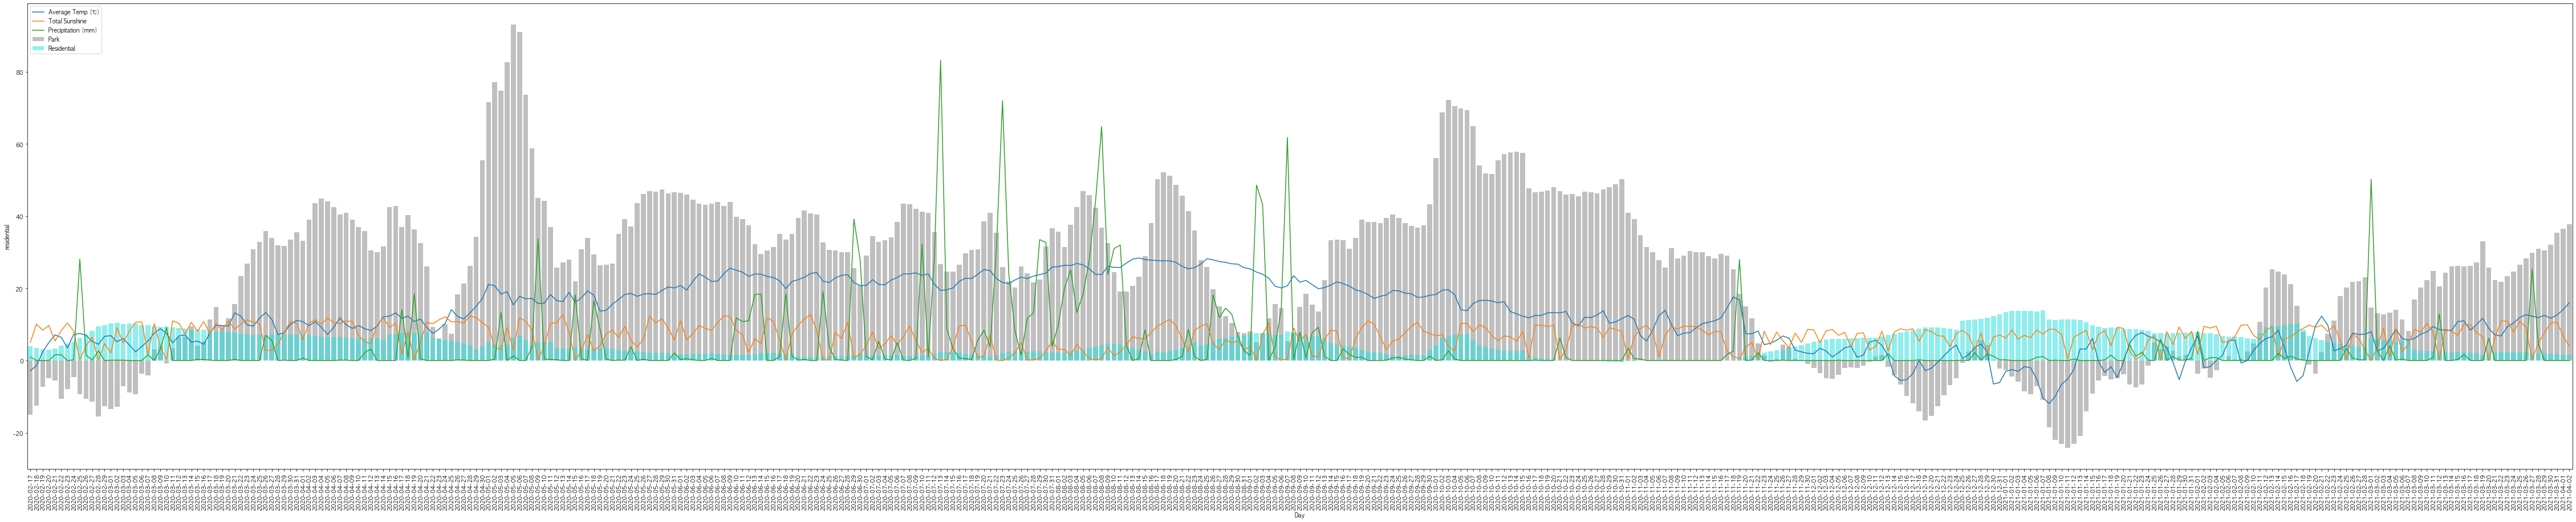

In [28]:
# 일 별 날씨와 유동인구 수
plt.figure(figsize = (80, 15))
plt.plot(korea_weather_google['date'], korea_weather_google['avg_temp'], label='Average Temp [℃]')
plt.plot(korea_weather_google['date'], korea_weather_google['sum_sunshine'], label='Total Sunshine')
plt.plot(korea_weather_google['date'], korea_weather_google['avg_rain'], label='Precipitation [mm]')
sns.barplot(x='Day', y='parks', data=google_float, color='gray', alpha=0.5, label='Park')
sns.barplot(x='Day', y='residential', data=google_float, color='cyan', alpha=0.5, label='Residential')
plt.legend(loc='upper left')
plt.xticks(rotation = 90)
plt.show()

코로나 확진자수와 관련성도 살펴보고자 한다.
확진자수가 크기 때문에 적절히 값을 줄여 비교하기 쉽게 스케일링한다.

/opt/anaconda3/envs/likelion/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


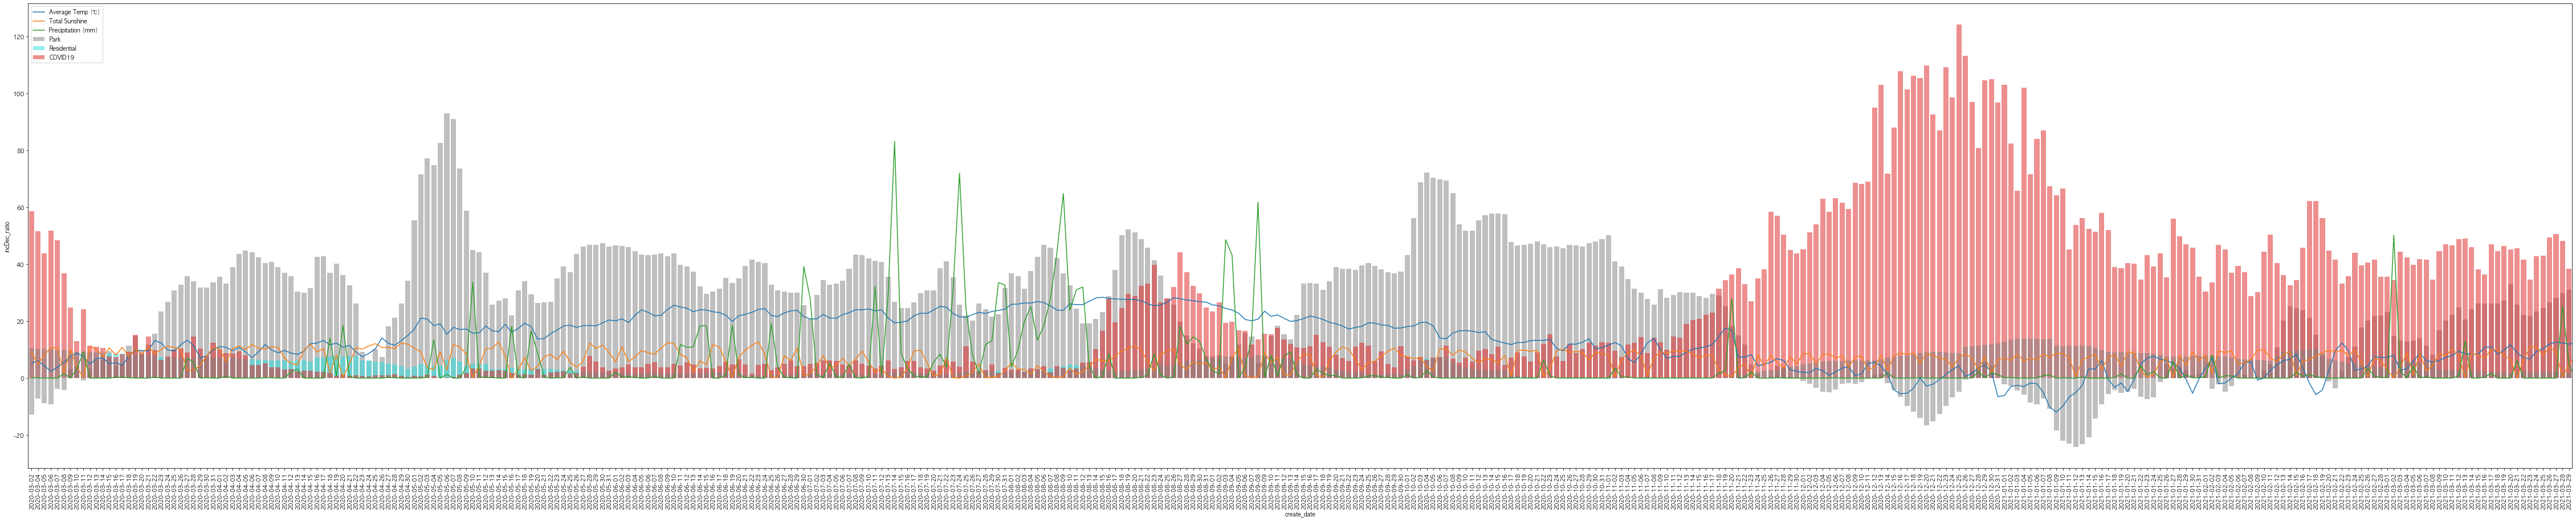

In [29]:
# 적절하게 수정한 지역별 코로나 확진자 수를 새로운 데이터 프레임으로 만듬
covid_region_refined = pd.read_csv("data/Covid19SidoInfState_refined.csv")

# 일 별 날씨와 유동인구 수와 코로나 확진자 수
covid_region_refined['incDec_ratio'] =  covid_region_refined['incDec'] * 0.1
plt.figure(figsize = (80, 15))
plt.plot(korea_weather_google2['date'], korea_weather_google2['avg_temp'], label='Average Temp [℃]')
plt.plot(korea_weather_google2['date'], korea_weather_google2['sum_sunshine'], label='Total Sunshine')
plt.plot(korea_weather_google2['date'], korea_weather_google2['avg_rain'], label='Precipitation [mm]')
sns.barplot(x='Day', y='parks', data=google_float2, color='gray', alpha=0.5, label='Park')
sns.barplot(x='Day', y='residential', data=google_float2, color='cyan', alpha=0.5, label='Residential')
sns.barplot(covid_region_refined['create_date'], covid_region_refined['incDec_ratio'], color='red', alpha=0.5, label='COVID19')
plt.legend(loc='upper left')
plt.xticks(rotation = 90)
plt.show()

날씨, 유동인구 변화, 코로나의 상관 관계를 살펴본 결과, 아래와 같은 추론이 가능해 보인다.
- 일조량의 추이선과 공원의 유동인구 변화 추이 선은 서로 닮아 있다. 하지만 꽤 비슷한 수준을 유지하는 일조량에 큰 영향을 받는다고 보기는 어렵다.
- 공원 유동인구에 큰 영향을 끼치는 것은 기온과 강수량으로 보인다. 기온은 양의 증가 관계, 강수량은 음의 증가 관계를 가지고 있다.
- 여름과 같은 특수 시기에는 강수량이 많아도 야외 활동에 큰 영향을 받지 않은 경향성도 보이나, 보편적으로 공원의 유동인구가 줄고, 집에 체류하는 시간이 길어지는 편이다.
- 낮은 기온에 야외 활동이 줄고, 실내 체류 시간이 글어지는 경향은 분명히 드러난다.

- 코로나 확진자 수가 증가하는 경우, 야외 유동인구가 급감하고, 실내 체류 시간이 길어지는 경향은 명확히 드러난다.
- 공원의 유동인구가 급증했던 일정 기간 이후에 코로나 확진자도 급증했다. 코로나 확진자 증거 직전에는 항상 야외활동량의 증가를 볼 수 있다.

## COVID19 - Economy
다음으로는 코로나로 인해 2019년부터 2020년까지 경제적으로 어떤 변화가 있었는지 살펴본다.

국가통계포털 데이터를 활용해 지역 별 코로나로 인한 실업률과 업종 별 영향을 살펴본다.

국가통계포털 데이터는 엑셀 파일이기 때문에 xlrd를 설치하여 데이터를 로드하였다.

## Economic Data Preprocessing
엑셀로 된 경제 데이터를 데이터프레임화 하고 전처리 작업을 진행한다.

In [32]:
경제인구데이터 = pd.read_excel('data/경제활동인구.xlsx')

경제인구데이터.head(5)


/opt/anaconda3/envs/likelion/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


,시도별,시점,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),15-64세 고용률 (%)
0,서울특별시,2019. 01,8484.8,5244.3,4976.5,267.8,3240.5,61.8,5.1,58.7,65.3
1,NaN,2019. 02,8487.0,5236.1,4958.1,278.0,3250.9,61.7,5.3,58.4,65.1
2,NaN,2019. 03,8483.3,5274.5,4981.6,292.9,3208.8,62.2,5.6,58.7,65.1
3,NaN,2019. 04,8480.8,5329.0,5052.4,276.6,3151.8,62.8,5.2,59.6,65.8
4,NaN,2019. 05,8475.3,5367.9,5107.4,260.5,3107.5,63.3,4.9,60.3,66.5


In [33]:
# 결측치 이전 값으로 채우기
경제인구데이터['시도별'] = 경제인구데이터['시도별'].ffill()

In [34]:
# 채워진 결측치 확인
경제인구데이터.head(5)

,시도별,시점,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),15-64세 고용률 (%)
0,서울특별시,2019. 01,8484.8,5244.3,4976.5,267.8,3240.5,61.8,5.1,58.7,65.3
1,서울특별시,2019. 02,8487.0,5236.1,4958.1,278.0,3250.9,61.7,5.3,58.4,65.1
2,서울특별시,2019. 03,8483.3,5274.5,4981.6,292.9,3208.8,62.2,5.6,58.7,65.1
3,서울특별시,2019. 04,8480.8,5329.0,5052.4,276.6,3151.8,62.8,5.2,59.6,65.8
4,서울특별시,2019. 05,8475.3,5367.9,5107.4,260.5,3107.5,63.3,4.9,60.3,66.5


In [35]:
# 데이터 속성
경제인구데이터.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시도별             408 non-null    object 
 1   시점              408 non-null    object 
 2   15세이상인구 (천명)    408 non-null    float64
 3   경제활동인구 (천명)     408 non-null    float64
 4   취업자 (천명)        408 non-null    float64
 5   실업자 (천명)        408 non-null    float64
 6   비경제활동인구 (천명)    408 non-null    float64
 7   경제활동참가율 (%)     408 non-null    float64
 8   실업률 (%)         408 non-null    float64
 9   고용률 (%)         408 non-null    float64
 10  15-64세 고용률 (%)  408 non-null    float64
dtypes: float64(9), object(2)
memory usage: 35.2+ KB


In [36]:
경제인구데이터['시도별'].value_counts()

부산광역시      24
충청남도       24
서울특별시      24
강원도        24
전라북도       24
대전광역시      24
경상북도       24
울산광역시      24
세종특별자치시    24
광주광역시      24
대구광역시      24
경상남도       24
충청북도       24
인천광역시      24
경기도        24
전라남도       24
제주도        24
Name: 시도별, dtype: int64

In [37]:
서울data = 경제인구데이터[경제인구데이터['시도별']== '서울특별시']
인천data = 경제인구데이터[경제인구데이터['시도별']== '인천광역시']
세종data = 경제인구데이터[경제인구데이터['시도별']== '세종특별자치시']
제주data = 경제인구데이터[경제인구데이터['시도별']== '제주도']
경남data = 경제인구데이터[경제인구데이터['시도별']== '경상남도']
광주data = 경제인구데이터[경제인구데이터['시도별']== '광주광역시']
대구data = 경제인구데이터[경제인구데이터['시도별']== '대구광역시']
대전data = 경제인구데이터[경제인구데이터['시도별']== '대전광역시']
전북data = 경제인구데이터[경제인구데이터['시도별']== '전라북도']
경기data = 경제인구데이터[경제인구데이터['시도별']== '경기도']
강원data = 경제인구데이터[경제인구데이터['시도별']== '강원도']
충청data = 경제인구데이터[경제인구데이터['시도별']== '충청도']
전남data = 경제인구데이터[경제인구데이터['시도별']== '전라남도']
울산data = 경제인구데이터[경제인구데이터['시도별']== '울산광역시']
경북data = 경제인구데이터[경제인구데이터['시도별']== '경상북도']
충남data = 경제인구데이터[경제인구데이터['시도별']== '충청남도']
충북data = 경제인구데이터[경제인구데이터['시도별']== '충청북도']
부산data = 경제인구데이터[경제인구데이터['시도별']== '부산광역시']


In [38]:
서울data.head()

,시도별,시점,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),15-64세 고용률 (%)
0,서울특별시,2019. 01,8484.8,5244.3,4976.5,267.8,3240.5,61.8,5.1,58.7,65.3
1,서울특별시,2019. 02,8487.0,5236.1,4958.1,278.0,3250.9,61.7,5.3,58.4,65.1
2,서울특별시,2019. 03,8483.3,5274.5,4981.6,292.9,3208.8,62.2,5.6,58.7,65.1
3,서울특별시,2019. 04,8480.8,5329.0,5052.4,276.6,3151.8,62.8,5.2,59.6,65.8
4,서울특별시,2019. 05,8475.3,5367.9,5107.4,260.5,3107.5,63.3,4.9,60.3,66.5


In [39]:
# 2019
서울ps = 서울data.loc[서울data['시점'].str.contains('2019')]
강원ps = 강원data.loc[강원data['시점'].str.contains('2019')]
경기ps = 경기data.loc[경기data['시점'].str.contains('2019')]
경남ps = 경남data.loc[경남data['시점'].str.contains('2019')]
경북ps = 경북data.loc[경북data['시점'].str.contains('2019')]
광주ps = 광주data.loc[광주data['시점'].str.contains('2019')]
대구ps = 대구data.loc[대구data['시점'].str.contains('2019')]
대전ps = 대전data.loc[대전data['시점'].str.contains('2019')]
세종ps = 세종data.loc[세종data['시점'].str.contains('2019')]
울산ps = 울산data.loc[울산data['시점'].str.contains('2019')]
인천ps = 인천data.loc[인천data['시점'].str.contains('2019')]
전남ps = 전남data.loc[전남data['시점'].str.contains('2019')]
전북ps = 전북data.loc[전북data['시점'].str.contains('2019')]
충남ps = 충남data.loc[충남data['시점'].str.contains('2019')]
충북ps = 충북data.loc[충북data['시점'].str.contains('2019')]
제주ps = 제주data.loc[제주data['시점'].str.contains('2019')]

## Economic Data Visualization

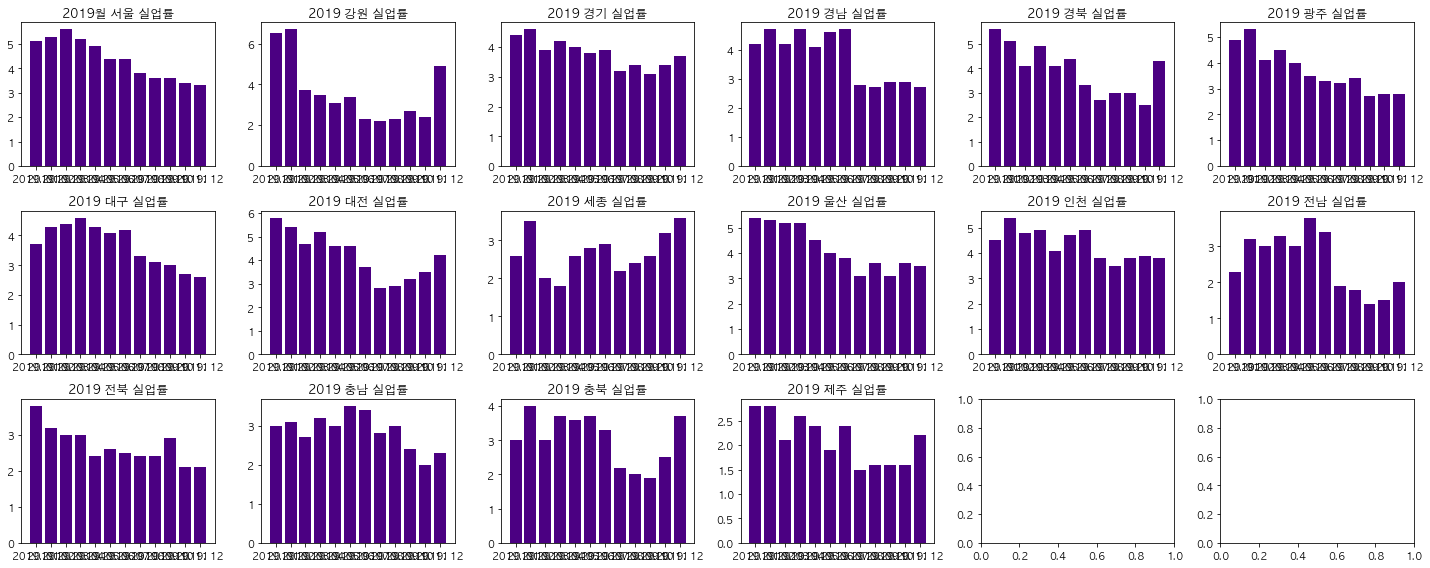

In [40]:
# 시각화
fig, ax = plt.subplots(3, 6, figsize=(20, 8))

ax[0, 0].set_title('2019월 서울 실업률')
ax[0, 0].bar(서울ps['시점'],서울ps['실업률 (%)'], color='indigo')
ax[0, 1].set_title('2019 강원 실업률')
ax[0, 1].bar(강원ps['시점'], 강원ps['실업률 (%)'], color='indigo')
ax[0, 2].set_title('2019 경기 실업률')
ax[0, 2].bar(경기ps['시점'], 경기ps['실업률 (%)'], color='indigo')
ax[0, 3].set_title('2019 경남 실업률')
ax[0, 3].bar(경남ps['시점'], 경남ps['실업률 (%)'], color='indigo')
ax[0, 4].set_title('2019 경북 실업률')
ax[0, 4].bar(경북ps['시점'], 경북ps['실업률 (%)'], color='indigo')
ax[0, 5].set_title('2019 광주 실업률')
ax[0, 5].bar(광주ps['시점'], 광주ps['실업률 (%)'], color='indigo')
ax[1, 0].set_title('2019 대구 실업률')
ax[1, 0].bar(대구ps['시점'], 대구ps['실업률 (%)'], color='indigo')
ax[1, 1].set_title('2019 대전 실업률')
ax[1, 1].bar(대전ps['시점'], 대전ps['실업률 (%)'], color='indigo')
ax[1, 2].set_title('2019 세종 실업률')
ax[1, 2].bar(세종ps['시점'], 세종ps['실업률 (%)'], color='indigo')
ax[1, 3].set_title('2019 울산 실업률')
ax[1, 3].bar(울산ps['시점'], 울산ps['실업률 (%)'], color='indigo')
ax[1, 4].set_title('2019 인천 실업률')
ax[1, 4].bar(인천ps['시점'], 인천ps['실업률 (%)'], color='indigo')
ax[1, 5].set_title('2019 전남 실업률')
ax[1, 5].bar(전남ps['시점'], 전남ps['실업률 (%)'], color='indigo')
ax[2, 0].set_title('2019 전북 실업률')
ax[2, 0].bar(전북ps['시점'], 전북ps['실업률 (%)'], color='indigo')
ax[2, 1].set_title('2019 충남 실업률')
ax[2, 1].bar(충남ps['시점'], 충남ps['실업률 (%)'], color='indigo')
ax[2, 2].set_title('2019 충북 실업률')
ax[2, 2].bar(충북ps['시점'], 충북ps['실업률 (%)'], color='indigo')
ax[2, 3].set_title('2019 제주 실업률')
ax[2, 3].bar(제주ps['시점'], 제주ps['실업률 (%)'], color='indigo')
plt.tight_layout()
plt.show()

2019년의 경우 실업률은 대체로 5% 아래의 수준임을 알 수 있다.

In [41]:
서울nb = 서울data.loc[서울data['시점'].str.contains('2020')]
강원nb = 강원data.loc[강원data['시점'].str.contains('2020')]
경기nb = 경기data.loc[경기data['시점'].str.contains('2020')]
경남nb = 경남data.loc[경남data['시점'].str.contains('2020')]
경북nb = 경북data.loc[경북data['시점'].str.contains('2020')]
광주nb = 광주data.loc[광주data['시점'].str.contains('2020')]
대구nb = 대구data.loc[대구data['시점'].str.contains('2020')]
대전nb = 대전data.loc[대전data['시점'].str.contains('2020')]
세종nb = 세종data.loc[세종data['시점'].str.contains('2020')]
울산nb = 울산data.loc[울산data['시점'].str.contains('2020')]
인천nb = 인천data.loc[인천data['시점'].str.contains('2020')]
전남nb = 전남data.loc[전남data['시점'].str.contains('2020')]
전북nb = 전북data.loc[전북data['시점'].str.contains('2020')]
충남nb = 충남data.loc[충남data['시점'].str.contains('2020')]
충북nb = 충북data.loc[충북data['시점'].str.contains('2020')]
제주nb = 제주data.loc[제주data['시점'].str.contains('2020')]

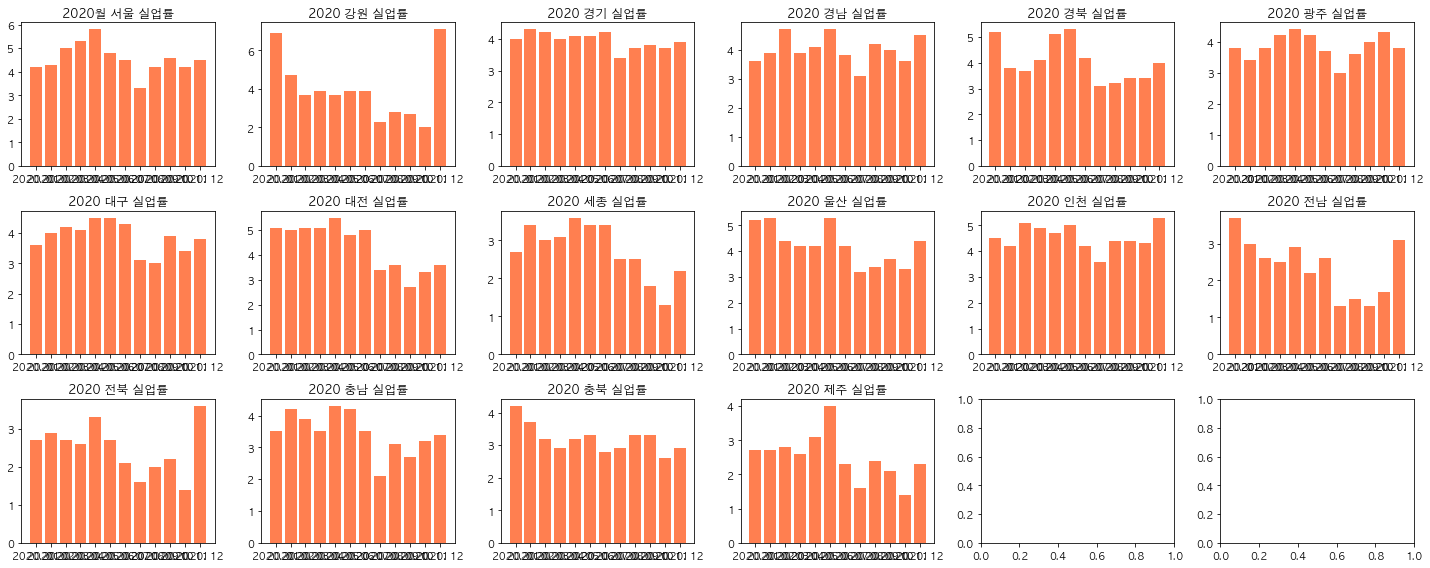

In [42]:
# 시각화
fig, ax = plt.subplots(3, 6, figsize=(20, 8))

ax[0, 0].set_title('2020월 서울 실업률')
ax[0, 0].bar(서울nb['시점'],서울nb['실업률 (%)'], color='coral')
ax[0, 1].set_title('2020 강원 실업률')
ax[0, 1].bar(강원nb['시점'], 강원nb['실업률 (%)'], color='coral')
ax[0, 2].set_title('2020 경기 실업률')
ax[0, 2].bar(경기nb['시점'], 경기nb['실업률 (%)'], color='coral')
ax[0, 3].set_title('2020 경남 실업률')
ax[0, 3].bar(경남nb['시점'], 경남nb['실업률 (%)'], color='coral')
ax[0, 4].set_title('2020 경북 실업률')
ax[0, 4].bar(경북nb['시점'], 경북nb['실업률 (%)'], color='coral')
ax[0, 5].set_title('2020 광주 실업률')
ax[0, 5].bar(광주nb['시점'], 광주nb['실업률 (%)'], color='coral')
ax[1, 0].set_title('2020 대구 실업률')
ax[1, 0].bar(대구nb['시점'], 대구nb['실업률 (%)'], color='coral')
ax[1, 1].set_title('2020 대전 실업률')
ax[1, 1].bar(대전nb['시점'], 대전nb['실업률 (%)'], color='coral')
ax[1, 2].set_title('2020 세종 실업률')
ax[1, 2].bar(세종nb['시점'], 세종nb['실업률 (%)'], color='coral')
ax[1, 3].set_title('2020 울산 실업률')
ax[1, 3].bar(울산nb['시점'], 울산nb['실업률 (%)'], color='coral')
ax[1, 4].set_title('2020 인천 실업률')
ax[1, 4].bar(인천nb['시점'], 인천nb['실업률 (%)'], color='coral')
ax[1, 5].set_title('2020 전남 실업률')
ax[1, 5].bar(전남nb['시점'], 전남nb['실업률 (%)'], color='coral')
ax[2, 0].set_title('2020 전북 실업률')
ax[2, 0].bar(전북nb['시점'], 전북nb['실업률 (%)'], color='coral')
ax[2, 1].set_title('2020 충남 실업률')
ax[2, 1].bar(충남nb['시점'], 충남nb['실업률 (%)'], color='coral')
ax[2, 2].set_title('2020 충북 실업률')
ax[2, 2].bar(충북nb['시점'], 충북nb['실업률 (%)'], color='coral')
ax[2, 3].set_title('2020 제주 실업률')
ax[2, 3].bar(제주nb['시점'], 제주nb['실업률 (%)'], color='coral')
plt.tight_layout()
plt.show()

앞선 2019년과 비교해보면 2020년에는 경기, 서울, 광주, 세종 등 *대도시에서 실업률이 눈에 띈다*.

코로나로 인한 2019년과 2020년 실업률을 확인했으니 다음으로는 업종 별 영향을 살펴보겠다.

In [43]:
# 데이터 불러오기
가게업종 = pd.read_excel('data/소상공인_업종별_실적_및_전망.xlsx')
가게업종.head(5)

/opt/anaconda3/envs/likelion/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  


,업종별(1),시점,체감,전망
0,제조업,2019. 01,63.7,83.9
1,NaN,2019. 02,65.9,89.1
2,NaN,2019. 03,75.0,90.7
3,NaN,2019. 04,71.2,91.7
4,NaN,2019. 05,69.2,82.9


In [44]:
# 결측치 이전 값으로 채우기
가게업종['업종별(1)'] = 가게업종['업종별(1)'].ffill()

In [45]:
가게업종.head(5)

,업종별(1),시점,체감,전망
0,제조업,2019. 01,63.7,83.9
1,제조업,2019. 02,65.9,89.1
2,제조업,2019. 03,75.0,90.7
3,제조업,2019. 04,71.2,91.7
4,제조업,2019. 05,69.2,82.9


In [46]:
가게업종['업종별(1)'].value_counts()

제조업           24
스포츠 및 오락관련    24
음식점업          24
수리업           24
개인 서비스업       24
교육 서비스업       24
소매업           24
부동산업          24
전문기술사업        24
Name: 업종별(1), dtype: int64

In [47]:
제조업 = 가게업종[가게업종['업종별(1)'] == '제조업']
음식점업 = 가게업종[가게업종['업종별(1)'] == '음식점업']
서비스업 = 가게업종[가게업종['업종별(1)'] == '개인 서비스업']
교육업 = 가게업종[가게업종['업종별(1)'] == '교육 서비스업']
부동산업 = 가게업종[가게업종['업종별(1)'] == '부동산업']
소매업 = 가게업종[가게업종['업종별(1)'] == '소매업']
스포츠업 = 가게업종[가게업종['업종별(1)'] == '스포츠 및 오락관련']
수리업 = 가게업종[가게업종['업종별(1)'] == '수리업']
전문기술사업 = 가게업종[가게업종['업종별(1)'] == '전문기술업']

In [48]:
# 2019
제조업ps = 제조업.loc[제조업['시점'].str.contains('2019')]
음식점업ps = 음식점업.loc[음식점업['시점'].str.contains('2019')]
서비스업ps = 서비스업.loc[서비스업['시점'].str.contains('2019')]
교육업ps = 교육업.loc[교육업['시점'].str.contains('2019')]
부동산업ps = 부동산업.loc[부동산업['시점'].str.contains('2019')]
소매업ps = 소매업.loc[소매업['시점'].str.contains('2019')]
스포츠업ps = 스포츠업.loc[스포츠업['시점'].str.contains('2019')]
수리업ps = 수리업.loc[수리업['시점'].str.contains('2019')]
전문기술사업ps = 전문기술사업.loc[전문기술사업['시점'].str.contains('2019')]

In [49]:
제조업nb = 제조업.loc[제조업['시점'].str.contains('2020')]
음식점업nb = 음식점업.loc[음식점업['시점'].str.contains('2020')]
서비스업nb = 서비스업.loc[서비스업['시점'].str.contains('2020')]
교육업nb = 교육업.loc[교육업['시점'].str.contains('2020')]
부동산업nb = 부동산업.loc[부동산업['시점'].str.contains('2020')]
소매업nb = 소매업.loc[소매업['시점'].str.contains('2020')]
스포츠업nb = 스포츠업.loc[스포츠업['시점'].str.contains('2020')]
수리업nb = 수리업.loc[수리업['시점'].str.contains('2020')]
전문기술사업nb = 전문기술사업.loc[전문기술사업['시점'].str.contains('2020')]

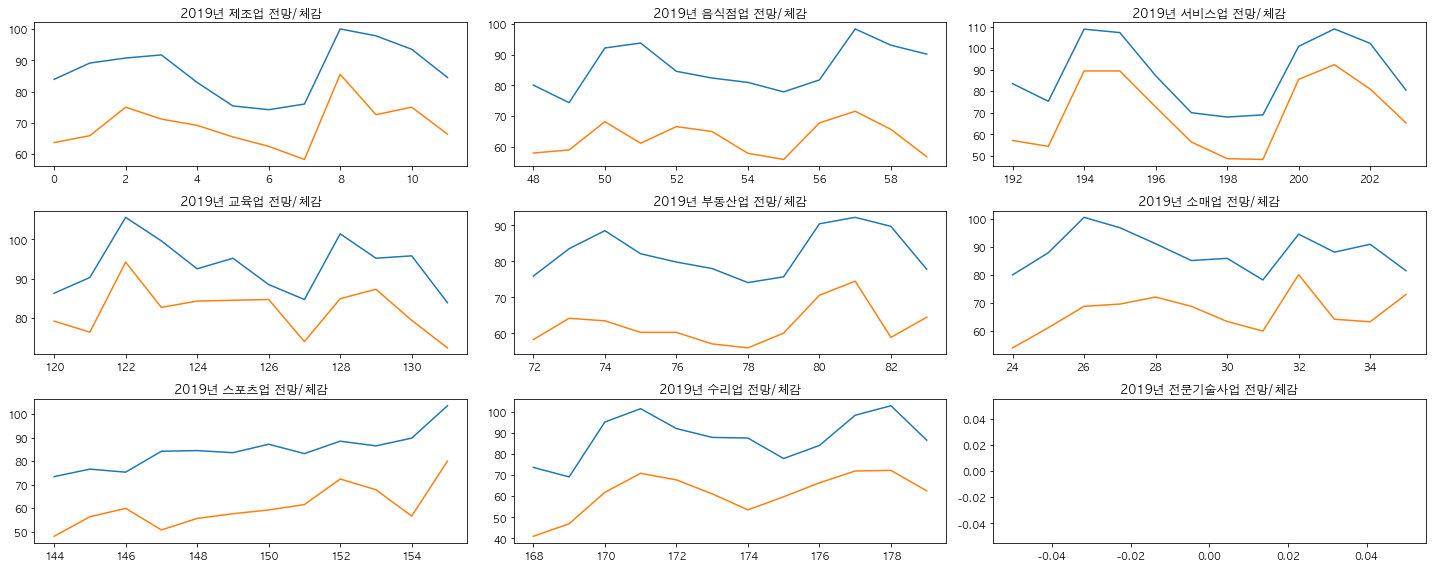

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(20, 8))

ax[0, 0].set_title('2019년 제조업 전망/체감')
ax[0, 0].plot(제조업ps['전망'], label='전망')
ax[0, 0].plot(제조업ps['체감'], label='체감')
ax[0, 1].set_title('2019년 음식점업 전망/체감')
ax[0, 1].plot(음식점업ps['전망'], label='전망')
ax[0, 1].plot(음식점업ps['체감'], label='체감')
ax[0, 2].set_title('2019년 서비스업 전망/체감')
ax[0, 2].plot(서비스업ps['전망'], label='전망')
ax[0, 2].plot(서비스업ps['체감'], label='체감')
ax[1, 0].set_title('2019년 교육업 전망/체감')
ax[1, 0].plot(교육업ps['전망'], label='전망')
ax[1, 0].plot(교육업ps['체감'], label='체감')
ax[1, 1].set_title('2019년 부동산업 전망/체감')
ax[1, 1].plot(부동산업ps['전망'], label='전망')
ax[1, 1].plot(부동산업ps['체감'], label='체감')
ax[1, 2].set_title('2019년 소매업 전망/체감')
ax[1, 2].plot(소매업ps['전망'], label='전망')
ax[1, 2].plot(소매업ps['체감'], label='체감')
ax[2, 0].set_title('2019년 스포츠업 전망/체감')
ax[2, 0].plot(스포츠업ps['전망'], label='전망')
ax[2, 0].plot(스포츠업ps['체감'], label='체감')
ax[2, 1].set_title('2019년 수리업 전망/체감')
ax[2, 1].plot(수리업ps['전망'], label='전망')
ax[2, 1].plot(수리업ps['체감'], label='체감')
ax[2, 2].set_title('2019년 전문기술사업 전망/체감')
ax[2, 2].plot(전문기술사업ps['전망'], label='전망')
ax[2, 2].plot(전문기술사업ps['체감'], label='체감')
plt.tight_layout()
plt.show()

2019년도 전망(파란색)과 실적(노란색)을 보면 *실적과 사전 예측한 전망의 그래프가 많이 닮아있는 것을 볼 수 있다*.

다시 말해, 어느 정도 **예측한 수요가 현실과 잘 맞아 떨어지는 모습**이라 할 수 있다.

업종 별 그래프 : (x축=인덱스, 날짜별로 정렬)

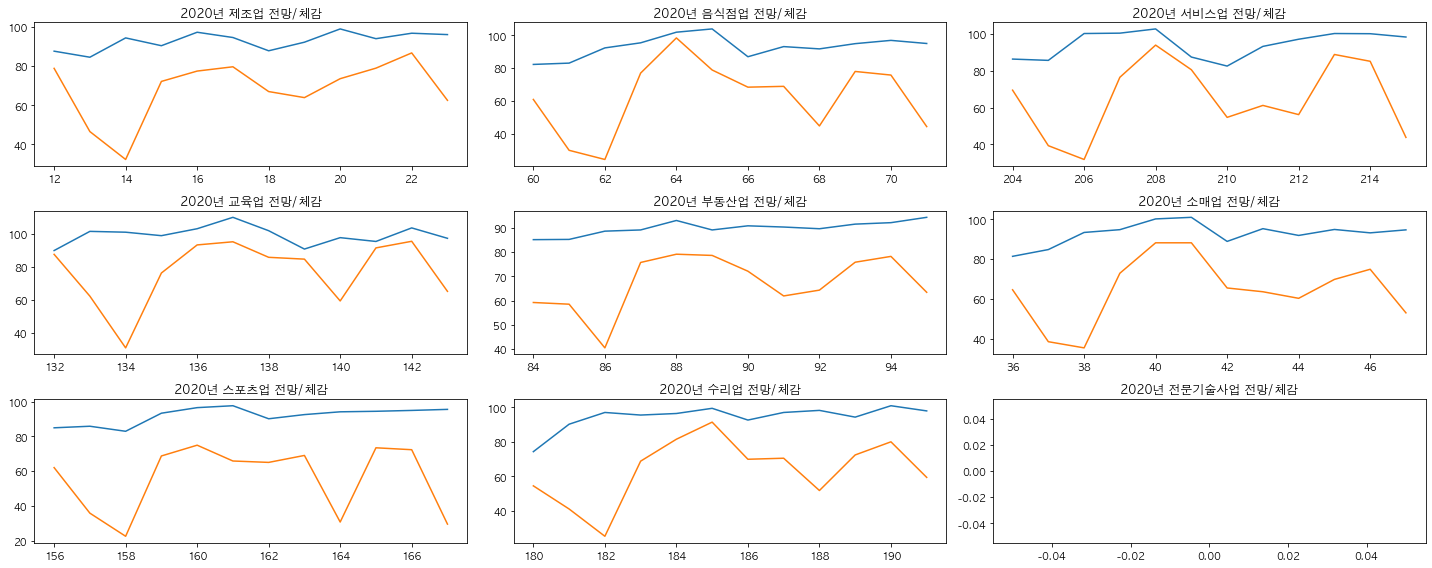

In [51]:
fig, ax = plt.subplots(3, 3, figsize=(20, 8))

ax[0, 0].set_title('2020년 제조업 전망/체감')
ax[0, 0].plot(제조업nb['전망'], label='전망')
ax[0, 0].plot(제조업nb['체감'], label='체감')
ax[0, 1].set_title('2020년 음식점업 전망/체감')
ax[0, 1].plot(음식점업nb['전망'], label='전망')
ax[0, 1].plot(음식점업nb['체감'], label='체감')
ax[0, 2].set_title('2020년 서비스업 전망/체감')
ax[0, 2].plot(서비스업nb['전망'], label='전망')
ax[0, 2].plot(서비스업nb['체감'], label='체감')
ax[1, 0].set_title('2020년 교육업 전망/체감')
ax[1, 0].plot(교육업nb['전망'], label='전망')
ax[1, 0].plot(교육업nb['체감'], label='체감')
ax[1, 1].set_title('2020년 부동산업 전망/체감')
ax[1, 1].plot(부동산업nb['전망'], label='전망')
ax[1, 1].plot(부동산업nb['체감'], label='체감')
ax[1, 2].set_title('2020년 소매업 전망/체감')
ax[1, 2].plot(소매업nb['전망'], label='전망')
ax[1, 2].plot(소매업nb['체감'], label='체감')
ax[2, 0].set_title('2020년 스포츠업 전망/체감')
ax[2, 0].plot(스포츠업nb['전망'], label='전망')
ax[2, 0].plot(스포츠업nb['체감'], label='체감')
ax[2, 1].set_title('2020년 수리업 전망/체감')
ax[2, 1].plot(수리업nb['전망'], label='전망')
ax[2, 1].plot(수리업nb['체감'], label='체감')
ax[2, 2].set_title('2020년 전문기술사업 전망/체감')
ax[2, 2].plot(전문기술사업nb['전망'], label='전망')
ax[2, 2].plot(전문기술사업nb['체감'], label='체감')
plt.tight_layout()
plt.show()

그런데 코로나 이후 사전 예측 전망과는 아주 다른 실적을 보인다.

즉, 코로나라는 예상치 못한 변수 때문에 다양한 업계가 크게 흔들리고 있다는 것을 알 수 있다.

특히 코로나가 심해진 3월부터는 *업종을 가리지 않고 심하게 타격을 입는 모습*을 볼 수 있다.


코로나로 대체로 **모든 업계는 하향선**을 보이고 있어 앞으로의 창업은 조금 더 기다림이 필요할 것으로 예측된다.


